<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Preprocesamiento y Análisis Exploratorio de Datos (EDA) </font> </center>



### ¿Qué es?

Es cuando revisamos por primera vez los datos que nos llegan, por ejemplo un archivo CSV que nos entregan y deberemos intentar comprender **¿de qué se trata?**, vislumbrar posibles patrones y reconociendo distribuciones estadísticas que puedan ser útiles en el futuro.

Lo ideal es que tengamos un objetivo que nos hayan *“adjuntado”* con los datos, que indique lo que se quiere conseguir a partir de esos datos. Por ejemplo, nos pasan un excel y nos dicen *“Queremos predecir ventas a 30 días”*, ó *“Clasificar casos malignos/benignos de una enfermedad”*, *“Queremos identificar audiencias que van a realizar re-compra de un producto”*, *“queremos hacer pronóstico de fidelización de clientes/abandonos”*, *“Quiero detectar casos de fraude en mi sistema en tiempo real”*.

### ¿Que hacer cuando llegar un archivo?

- ¿Cuántos registros hay?
    - ¿Son demasiado pocos?
    - ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
    
- ¿Están todas las filas completas ó tenemos campos con valores nulos?
    - En caso que haya demasiados nulos: ¿Queda el resto de información inútil?
    
- ¿Que datos son discretos y cuales continuos?
    - Muchas veces sirve obtener el tipo de datos: texto, int, double, float
    
- Si es un problema de tipo supervisado:
    - ¿Cuál es la columna de “salida”? ¿binaria, multiclase?
    - ¿Esta balanceado el conjunto salida?
    
- ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?

- ¿Siguen alguna distribución?

- ¿Hay correlación entre features (características)?

- En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo “Abogado” y “Abogadas”, “avogado” pertenecerían todos a un mismo conjunto.

- ¿Estamos ante un problema dependiente del tiempo? Es decir un TimeSeries.

- Si fuera un problema de Visión Artificial: ¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?

- ¿Cuales son los Outliers? (unos pocos datos aislados que difieren drásticamente del resto y “contaminan” ó desvían las distribuciones)
    - Podemos eliminarlos? es importante conservarlos?
    - son errores de carga o son reales?
    
- ¿Tenemos posible sesgo de datos? (por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine)


## Ejemplo

In [1]:
import pandas as pd
import numpy as np
from HAIA import HyAIA as HY


In [2]:
df_movie = pd.read_csv('Data/movie_metadata.csv')
df_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

## Manejando datos faltantes

In [4]:
df_movie_clean = df_movie.dropna()
df_movie_clean.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [5]:
df_movie_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3756 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3756 non-null   object 
 1   director_name              3756 non-null   object 
 2   num_critic_for_reviews     3756 non-null   float64
 3   duration                   3756 non-null   float64
 4   director_facebook_likes    3756 non-null   float64
 5   actor_3_facebook_likes     3756 non-null   float64
 6   actor_2_name               3756 non-null   object 
 7   actor_1_facebook_likes     3756 non-null   float64
 8   gross                      3756 non-null   float64
 9   genres                     3756 non-null   object 
 10  actor_1_name               3756 non-null   object 
 11  movie_title                3756 non-null   object 
 12  num_voted_users            3756 non-null   int64  
 13  cast_total_facebook_likes  3756 non-null   int64

In [6]:
df_movie['duration']

0       178.0
1       169.0
2       148.0
3       164.0
4         NaN
        ...  
5038     87.0
5039     43.0
5040     76.0
5041    100.0
5042     90.0
Name: duration, Length: 5043, dtype: float64

In [7]:
df_movie['duration'].fillna(df_movie['duration'].mean(), inplace=True)
df_movie['duration']

0       178.000000
1       169.000000
2       148.000000
3       164.000000
4       107.201074
           ...    
5038     87.000000
5039     43.000000
5040     76.000000
5041    100.000000
5042     90.000000
Name: duration, Length: 5043, dtype: float64

In [8]:
df_movie['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [9]:
df_movie['color'].fillna('Unk', inplace=True)
df_movie['color']

0       Color
1       Color
2       Color
3       Color
4         Unk
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5043, dtype: object

In [10]:
df_movie['color'].unique()

array(['Color', 'Unk', ' Black and White'], dtype=object)

In [11]:
df_movie['genres'].unique()

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thrille

# Limpieza de los datos

In [12]:
dirty_df = pd.read_csv('Data/dirty_data.csv')
dirty_df.head()

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,"Alfonso A,guilar",6439
1,35,05/07/1958,casado,edu6ardo Castillo,689 24 9939
2,46,01-26-1956,Soltero,jocelyn medel,306-05-2792
3,57,19xx-10-23,divorciado,VICTOR ramos _ _ _,99922a45832
4,10,02/12/0054,SOLTERO,CARLOS EDUARDO; OCHOA ARAMBULA,6439


In [13]:
import string

In [14]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
string.digits

'0123456789'

In [16]:
# remover signos de puntuación
def remove_punctuation(x):
    try:
        x = ''.join(ch for ch in x if ch not in string.punctuation)
    except:
        print(f'{x} no es una cadena de caracteres')
        pass
    return x
        

In [17]:
s = '__Alf:onso A,guilar'

In [18]:
remove_punctuation(s)

'Alfonso Aguilar'

In [19]:
dirty_df['people'].apply(remove_punctuation)

0                      Alfonso Aguilar
1                    edu6ardo Castillo
2                        jocelyn medel
3                      VICTOR ramos   
4        CARLOS EDUARDO OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6             JUAN MARIO OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9      JOSE ALEJANDRO PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11              JOSE ALFONSO RAMIREZ D
12              ANA PAULA RANGEL OCHOA
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

In [20]:
def remove_digits(x):
    try:
        x=''.join(ch for ch in x if ch not in string.digits)
    except:
        print(f'{x} no es una cadena de caracteres')
        pass
    return x

In [21]:
remove_digits('5edu6ardo Cast79illo')

'eduardo Castillo'

In [22]:
dirty_df['people'].apply(remove_punctuation).apply(remove_digits)

0                      Alfonso Aguilar
1                     eduardo Castillo
2                        jocelyn medel
3                      VICTOR ramos   
4        CARLOS EDUARDO OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6             JUAN MARIO OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9      JOSE ALEJANDRO PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11              JOSE ALFONSO RAMIREZ D
12              ANA PAULA RANGEL OCHOA
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

In [23]:
# remover espacios en blanco
def remove_whitespace(x):
    try:
        x=' '.join(x.split())
    except:
        pass
    return x

# convertir a minisculas
def lower_text(x):
    try:
        x = x.lower()
    except:
        pass
    return x

#convertir a mayusculas
def upper_text(x):
    try:
        x = x.upper()
    except:
        pass
    return x

# Función que convierta a mayúsculas la primera letra
def capitalize_text(x):
    try:
        x = x.capitalize()
    except:
        pass
    return x
# reemplazar texto
def replace_text(x,to_replace, replacement):
    try:
        x = x.replace(to_replace, replacement)
    except:
        pass
    return x


In [24]:
dirty_df['people']

0                     Alfonso A,guilar
1                    edu6ardo Castillo
2                        jocelyn medel
3                   VICTOR ramos _ _ _
4       CARLOS EDUARDO; OCHOA ARAMBULA
5           JOSE MANUEL OCHOA CARDENAS
6            JUAN MARIO; OCHOA NAVARRO
7                LUIS ONTANEDA MIJARES
8          EDUARDO OMAR ORTEGA RAMIREZ
9     JOSE ALEJANDRO& PRECIADO GANDARA
10    Jose Aantonio Quintero Rodriguez
11             JOSE ALFONSO RAMIREZ D.
12             ANA PAULA RANGEL OCHOA&
13                  Arturo RUIZ CHAVEZ
Name: people, dtype: object

In [25]:
dirty_df['people'] = dirty_df['people'].apply(remove_punctuation).apply(remove_digits).apply(lower_text).apply(capitalize_text).apply(remove_whitespace)

In [26]:
dirty_df['people']

0                      Alfonso aguilar
1                     Eduardo castillo
2                        Jocelyn medel
3                         Victor ramos
4        Carlos eduardo ochoa arambula
5           Jose manuel ochoa cardenas
6             Juan mario ochoa navarro
7                Luis ontaneda mijares
8          Eduardo omar ortega ramirez
9      Jose alejandro preciado gandara
10    Jose aantonio quintero rodriguez
11              Jose alfonso ramirez d
12              Ana paula rangel ochoa
13                  Arturo ruiz chavez
Name: people, dtype: object

In [27]:
dirty_df['people'].apply(replace_text, args=('d','D'))

0                      Alfonso aguilar
1                     EDuarDo castillo
2                        Jocelyn meDel
3                         Victor ramos
4        Carlos eDuarDo ochoa arambula
5           Jose manuel ochoa carDenas
6             Juan mario ochoa navarro
7                Luis ontaneDa mijares
8          EDuarDo omar ortega ramirez
9      Jose alejanDro preciaDo ganDara
10    Jose aantonio quintero roDriguez
11              Jose alfonso ramirez D
12              Ana paula rangel ochoa
13                  Arturo ruiz chavez
Name: people, dtype: object

In [28]:
dirty_df['birth_date'] = dirty_df['birth_date'].apply(replace_text, args=('-','/')).apply(replace_text, args=('?','/')).apply(replace_text, args=('xx','00'))

In [29]:
dirty_df

,age,birth_date,marital,people,ssn
0,24,02/12/1954,soltero,Alfonso aguilar,6439
1,35,05/07/1958,casado,Eduardo castillo,689 24 9939
2,46,01/26/1956,Soltero,Jocelyn medel,306-05-2792
3,57,1900/10/23,divorciado,Victor ramos,99922a45832
4,10,02/12/0054,SOLTERO,Carlos eduardo ochoa arambula,6439
5,25,05/07/1958,CASado,Jose manuel ochoa cardenas,689 24 9939
6,63,01/26/1956,Soltero,Juan mario ochoa navarro,306-05-2792
7,59,1900/10/23,DIVORCIADO,Luis ontaneda mijares,99922a45832
8,69,02/12/1954,soltero,Eduardo omar ortega ramirez,NaN
9,59,05/07/1958,NaN,Jose alejandro preciado gandara,6439


### Crear una librería HA_IA que contenga la clase HyAIA

## Reporte de Calidad de Datos

In [30]:
df_countries = pd.read_csv('Data/countries.csv', sep=';')

In [31]:
df_countries.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [32]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [33]:
def dqr(data):
    
    #% Lista de variables de la base de datos
    columns = pd.DataFrame(list(data.columns.values), columns=['Columns_Names'], 
                           index=list(data.columns.values))
    
    #Lista de tipos de datos del dataframe
    data_dtypes = pd.DataFrame(data.dtypes, columns=['Dtypes'])
    
    #Lista de valores presentes
    present_values = pd.DataFrame(data.count(), columns=['Present_values'])
    
    #Lista de valores missing (Valores faltantes/nulos nan)
    missing_values = pd.DataFrame(data.isnull().sum(), columns=['Missing_values'])
    
    #Valores unicos de las columnas
    unique_values = pd.DataFrame(columns=['Unique_values'])
    for col in list(data.columns.values):
        unique_values.loc[col] = [data[col].nunique()]
    
    # Información estadística
    #Lista de valores máximos
    max_values = pd.DataFrame(columns=['Max_values'])
    for col in list(data.columns.values):
        try:
            max_values.loc[col] = [data[col].max()]
        except:
            max_values.loc[col] = ['N/A']
            pass
    #Lista de valores mínimos
    min_values = pd.DataFrame(columns=['Min_values'])
    for col in list(data.columns.values):
        try:
            min_values.loc[col] = [data[col].min()]
        except:
            min_values.loc[col] = ['N/A']
            pass
    #Lista de valores con su desviación estandar
    #Lista de valores con los percentiles
    #Lista de valores con la media
    mean_values = pd.DataFrame(columns=['Mean_values'])
    for col in list(data.columns.values):
        try:
            mean_values.loc[col] = [data[col].mean()]
        except:
            mean_values.loc[col] = ['N/A']
            pass
    
    # Lista informativa que nos diga si una columna es categorica (True, False)
    is_categorical = pd.DataFrame(columns=['Is_Categorical'])
    cat_cols = data.select_dtypes(exclude='number').columns
    for col in list(data.columns.values):
        if col in cat_cols:
            is_categorical.loc[col] = True
        else:
            is_categorical.loc[col] = False
            
    # Si categorica es True ---> generar otra lista con las categorias de esas columnas
    
    
    return columns.join(data_dtypes).join(present_values).join(missing_values).join(unique_values).join(max_values).join(min_values).join(mean_values).join(is_categorical)

In [34]:
dqr(df_countries)

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,Is_Categorical
alpha_2,alpha_2,object,251,1,251,N/A,N/A,N/A,True
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,N/A,True
area,area,float64,252,0,248,17100000.0,0.0,595287.855913,False
capital,capital,object,246,6,244,N/A,N/A,N/A,True
continent,continent,object,210,42,6,N/A,N/A,N/A,True
currency_code,currency_code,object,251,1,155,N/A,N/A,N/A,True
currency_name,currency_name,object,251,1,82,N/A,N/A,N/A,True
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,N/A,N/A,N/A,True
fips,fips,object,249,3,249,N/A,N/A,N/A,True
geoname_id,geoname_id,int64,252,0,252,8505033,49518,2427869.984127,False


In [35]:
class HyAIA:
    def __init__(self, df):
        self.data = df
        self.columns = df.columns
        self.dqr = self.get_dqr()
        
    def get_dqr(self):

        #% Lista de variables de la base de datos
        columns = pd.DataFrame(list(self.data.columns.values), columns=['Columns_Names'], 
                               index=list(self.data.columns.values))

        #Lista de tipos de datos del dataframe
        data_dtypes = pd.DataFrame(self.data.dtypes, columns=['Dtypes'])

        #Lista de valores presentes
        present_values = pd.DataFrame(self.data.count(), columns=['Present_values'])

        #Lista de valores missing (Valores faltantes/nulos nan)
        missing_values = pd.DataFrame(self.data.isnull().sum(), columns=['Missing_values'])

        #Valores unicos de las columnas
        unique_values = pd.DataFrame(columns=['Unique_values'])
        for col in list(self.data.columns.values):
            unique_values.loc[col] = [self.data[col].nunique()]

        # Información estadística
        #Lista de valores máximos
        max_values = pd.DataFrame(columns=['Max_values'])
        for col in list(self.data.columns.values):
            try:
                max_values.loc[col] = [self.data[col].max()]
            except:
                max_values.loc[col] = ['N/A']
                pass
        #Lista de valores mínimos
        min_values = pd.DataFrame(columns=['Min_values'])
        for col in list(self.data.columns.values):
            try:
                min_values.loc[col] = [self.data[col].min()]
            except:
                min_values.loc[col] = ['N/A']
                pass
        #Lista de valores con su desviación estandar
        #Lista de valores con los percentiles
        #Lista de valores con la media
        mean_values = pd.DataFrame(columns=['Mean_values'])
        for col in list(self.data.columns.values):
            try:
                mean_values.loc[col] = [self.data[col].mean()]
            except:
                mean_values.loc[col] = ['N/A']
                pass

        # Lista informativa que nos diga si una columna es categorica (True, False)
        is_categorical = pd.DataFrame(columns=['Is_Categorical'])
        cat_cols = self.data.select_dtypes(exclude='number').columns
        for col in list(self.data.columns.values):
            if col in cat_cols:
                is_categorical.loc[col] = True
            else:
                is_categorical.loc[col] = False

        # Si categorica es True ---> generar otra lista con las categorias de esas columnas


        return columns.join(data_dtypes).join(present_values).join(missing_values).join(unique_values).join(max_values).join(min_values).join(mean_values).join(is_categorical)

## Actividad.
Modificar la función dqr() para tener lo siguiente:

>1.- Crear una columna que sea booleana ('Is_categorical' True-->col categorica, False ---> numérica)

>2.- Crear una columna con las categorías de las columnas que resulten ser categóricas (if categorias >10, no ponerlas)

>3.- Aplicar el análisis estadístico de las columnas creadas (max, min, mean, std) solo para las columnas que sean numéricas ('Is_categorical' == False)


In [36]:
hy_countries = HyAIA(df_countries)

In [37]:
hy_countries.data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,.af
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,.ag
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,.ai


In [38]:
hy_countries.dqr

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,Is_Categorical
alpha_2,alpha_2,object,251,1,251,N/A,N/A,N/A,True
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,N/A,True
area,area,float64,252,0,248,17100000.0,0.0,595287.855913,False
capital,capital,object,246,6,244,N/A,N/A,N/A,True
continent,continent,object,210,42,6,N/A,N/A,N/A,True
currency_code,currency_code,object,251,1,155,N/A,N/A,N/A,True
currency_name,currency_name,object,251,1,82,N/A,N/A,N/A,True
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,N/A,N/A,N/A,True
fips,fips,object,249,3,249,N/A,N/A,N/A,True
geoname_id,geoname_id,int64,252,0,252,8505033,49518,2427869.984127,False


In [40]:
from HAIA import HyAIA as hy

In [41]:
hy_countries = hy(df_countries)

In [42]:
hy_countries.dqr

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,Is_Categorical
alpha_2,alpha_2,object,251,1,251,N/A,N/A,N/A,True
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,N/A,True
area,area,float64,252,0,248,17100000.0,0.0,595287.855913,False
capital,capital,object,246,6,244,N/A,N/A,N/A,True
continent,continent,object,210,42,6,N/A,N/A,N/A,True
currency_code,currency_code,object,251,1,155,N/A,N/A,N/A,True
currency_name,currency_name,object,251,1,82,N/A,N/A,N/A,True
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,N/A,N/A,N/A,True
fips,fips,object,249,3,249,N/A,N/A,N/A,True
geoname_id,geoname_id,int64,252,0,252,8505033,49518,2427869.984127,False


In [43]:
hy_countries.categoricos_columns

['alpha_2',
 'alpha_3',
 'capital',
 'continent',
 'currency_code',
 'currency_name',
 'fips',
 'languages',
 'name',
 'neighbours',
 'phone',
 'postal_code_format',
 'postal_code_regex',
 'tld']

In [44]:
for col_cat in hy_countries.categoricos_columns:
    hy_countries.data[col_cat].fillna('unk', inplace=True)
    

In [45]:
hy_countries.dqr = hy_countries.get_dqr()
hy_countries.dqr

,Columns_Names,Dtypes,Present_values,Missing_values,Unique_values,Max_values,Min_values,Mean_values,Is_Categorical
alpha_2,alpha_2,object,252,0,252,unk,AD,N/A,True
alpha_3,alpha_3,object,252,0,252,ZWE,ABW,N/A,True
area,area,float64,252,0,248,17100000.0,0.0,595287.855913,False
capital,capital,object,252,0,245,unk,Willemstad,N/A,True
continent,continent,object,252,0,7,unk,AF,N/A,True
currency_code,currency_code,object,252,0,156,unk,AED,N/A,True
currency_name,currency_name,object,252,0,83,unk,Afghani,N/A,True
eqivalent_fips_code,eqivalent_fips_code,object,1,251,1,N/A,N/A,N/A,True
fips,fips,object,252,0,250,unk,AA,N/A,True
geoname_id,geoname_id,int64,252,0,252,8505033,49518,2427869.984127,False


In [48]:
hy_countries.data.drop('eqivalent_fips_code', axis=1, inplace=True)

In [50]:
hy_countries.data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,unk,unk,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,unk,unk,.af
3,AG,ATG,443.0,St. John's,unk,XCD,Dollar,AC,3576396,en-AG,Antigua and Barbuda,unk,28,+1-268,86754,unk,unk,.ag
4,AI,AIA,102.0,The Valley,unk,XCD,Dollar,AV,3573511,en-AI,Anguilla,unk,660,+1-264,13254,unk,unk,.ai


# EDA utilizando el reporte de calidad de datos

In [51]:
hy_countries.data[hy_countries.data['alpha_3']=='MEX']

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
157,MX,MEX,1972550.0,Mexico City,unk,MXN,Peso,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx


In [52]:
hy_countries.data['languages'].unique()

array(['ca', 'ar-AE,fa,en,hi,ur', 'fa-AF,ps,uz-AF,tk', 'en-AG', 'en-AI',
       'sq,el', 'hy', 'pt-AO', 'unk', 'es-AR,en,it,de,fr,gn',
       'en-AS,sm,to', 'de-AT,hr,hu,sl', 'en-AU', 'nl-AW,es,en', 'sv-AX',
       'az,ru,hy', 'bs,hr-BA,sr-BA', 'en-BB', 'bn-BD,en',
       'nl-BE,fr-BE,de-BE', 'fr-BF', 'bg,tr-BG,rom', 'ar-BH,en,fa,ur',
       'fr-BI,rn', 'fr-BJ', 'fr', 'en-BM,pt', 'ms-BN,en-BN',
       'es-BO,qu,ay', 'nl,pap,en', 'pt-BR,es,en,fr', 'en-BS', 'dz',
       'en-BW,tn-BW', 'be,ru', 'en-BZ,es', 'en-CA,fr-CA,iu', 'ms-CC,en',
       'fr-CD,ln,kg', 'fr-CF,sg,ln,kg', 'fr-CG,kg,ln-CG',
       'de-CH,fr-CH,it-CH,rm', 'fr-CI', 'en-CK,mi', 'es-CL',
       'en-CM,fr-CM', 'zh-CN,yue,wuu,dta,ug,za', 'es-CO', 'es-CR,en',
       'es-CU', 'pt-CV', 'nl,pap', 'en,zh,ms-CC', 'el-CY,tr-CY,en',
       'cs,sk', 'de', 'fr-DJ,ar,so-DJ,aa', 'da-DK,en,fo,de-DK', 'en-DM',
       'es-DO', 'ar-DZ', 'es-EC', 'et,ru', 'ar-EG,en,fr', 'ar,mey',
       'aa-ER,ar,tig,kun,ti-ER', 'es-ES,ca,gl,eu,oc',
       'a

In [55]:
df_countries_es = hy_countries.data[hy_countries.data['languages'].str.contains('es')]
df_countries_es.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
13,AW,ABW,193.0,Oranjestad,unk,AWG,Guilder,AA,3577279,"nl-AW,es,en",Aruba,unk,533,297,71566,unk,unk,.aw
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,unk,unk,.bo
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
36,BZ,BLZ,22966.0,Belmopan,unk,BZD,Dollar,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,unk,unk,.bz


In [56]:
df_countries_es.shape

(29, 18)

In [61]:
df_countries_es_10 = df_countries_es.sort_values(by='population', ascending=False).head(10)

<AxesSubplot:xlabel='alpha_3'>

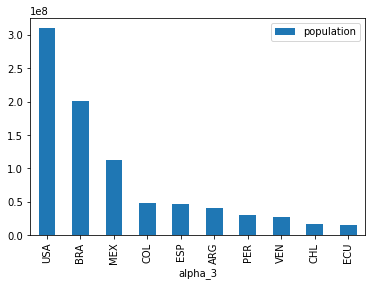

In [62]:
# Obtener el top 10 de países con mayor población que hablan Español
df_countries_es_10.set_index('alpha_3')[['population']].plot(kind='bar')

<AxesSubplot:xlabel='alpha_3'>

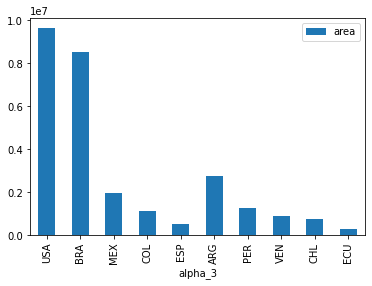

In [63]:
df_countries_es_10.set_index('alpha_3')[['area']].plot(kind='bar')

In [68]:
df_countries_20 = hy_countries.data[hy_countries.data['area']>200000]
df_countries_20.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,unk,unk,.af
7,AO,AGO,1246700.0,Luanda,AF,AOA,Kwanza,AO,3351879,pt-AO,Angola,"CD,NA,ZM,CG",24,244,13068161,unk,unk,.ao
8,AQ,ATA,14000000.0,unk,AN,unk,unk,AY,6697173,unk,Antarctica,unk,10,unk,0,unk,unk,.aq
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
12,AU,AUS,7686850.0,Canberra,OC,AUD,Dollar,AS,2077456,en-AU,Australia,unk,36,61,21515754,####,^(\d{4})$,.au


<AxesSubplot:xlabel='alpha_3'>

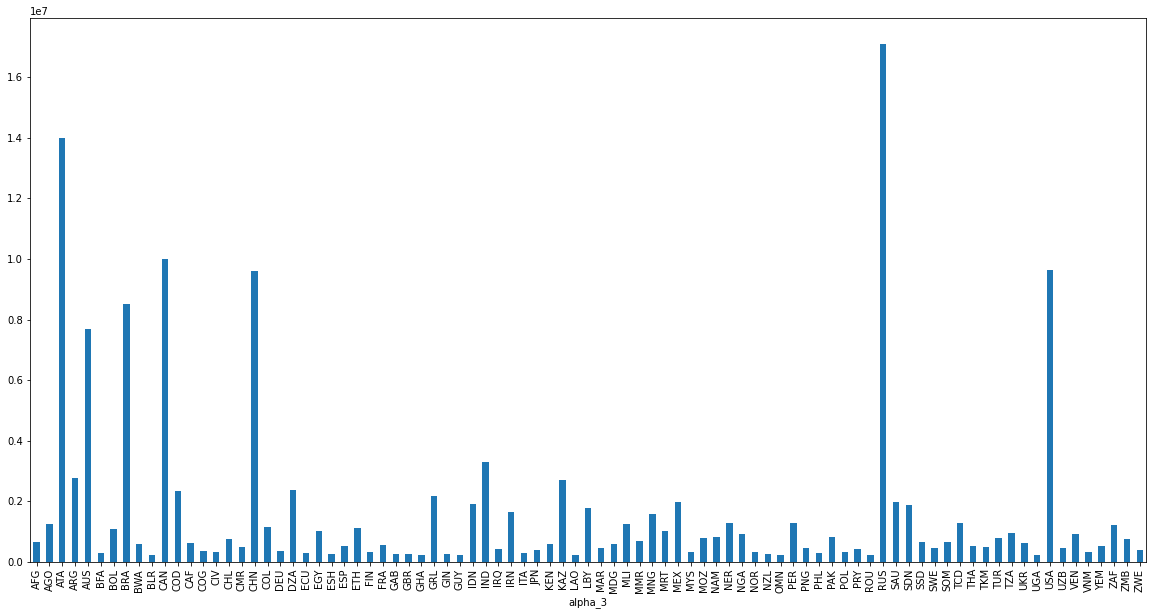

In [69]:
df_countries_20.set_index('alpha_3')['area'].plot(kind='bar', figsize=(20,10))

In [75]:
df_countries_es[df_countries_es['alpha_3']=='VEN']


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
238,VE,VEN,912050.0,Caracas,SA,VEF,Bolivar,VE,3625428,es-VE,Venezuela,"GY,BR,CO",862,58,27223228,####,^(\d{4})$,.ve


In [76]:
# Paises que tienen frontera con Colombia
df_countries_es[df_countries_es['neighbours'].str.contains('CO')]


,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,.br
62,EC,ECU,283560.0,Quito,SA,USD,Dollar,EC,3658394,es-EC,Ecuador,"PE,CO",218,593,14790608,@####@,^([a-zA-Z]\d{4}[a-zA-Z])$,.ec
173,PA,PAN,78200.0,Panama City,unk,PAB,Balboa,PM,3703430,"es-PA,en",Panama,"CR,CO",591,507,3410676,unk,unk,.pa
174,PE,PER,1285220.0,Lima,SA,PEN,Sol,PE,3932488,"es-PE,qu,ay",Peru,"EC,CL,BO,BR,CO",604,51,29907003,unk,unk,.pe
238,VE,VEN,912050.0,Caracas,SA,VEF,Bolivar,VE,3625428,es-VE,Venezuela,"GY,BR,CO",862,58,27223228,####,^(\d{4})$,.ve


## Actividad

1. ¿cuáles son los países que tienen como currency name == Peso?
2. ¿cuáles son los 5 países más grandes (área) que tienen como currency name == Peso ?
3. ¿cuáles son los 5 países más grandes (en población) que tienen como currency name == Peso ?
4. ¿Cuáles son los países y currency code, con currency name== Peso?

In [82]:
df_countries_es.groupby('currency_name')['name'].value_counts()

currency_name  name                
Balboa         Panama                  1
Bolivar        Venezuela               1
Boliviano      Bolivia                 1
Colon          Costa Rica              1
Cordoba        Nicaragua               1
Dollar         Belize                  1
               Ecuador                 1
               El Salvador             1
               Puerto Rico             1
               Trinidad and Tobago     1
               United States           1
Euro           Spain                   1
Franc          Equatorial Guinea       1
Guarani        Paraguay                1
Guilder        Aruba                   1
               Netherlands Antilles    1
Lempira        Honduras                1
Peso           Argentina               1
               Chile                   1
               Colombia                1
               Cuba                    1
               Dominican Republic      1
               Mexico                  1
               Urugua

In [84]:
#1.-

df_countries_es_peso =df_countries_es[df_countries_es['currency_name']=='Peso']
df_countries_es_peso

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",.ar
45,CL,CHL,756950.0,Santiago,SA,CLP,Peso,CI,3895114,es-CL,Chile,"PE,BO,AR",152,56,16746491,#######,^(\d{7})$,.cl
48,CO,COL,1138910.0,Bogota,SA,COP,Peso,CO,3686110,es-CO,Colombia,"EC,PE,PA,BR,VE",170,57,47790000,unk,unk,.co
50,CU,CUB,110860.0,Havana,unk,CUP,Peso,CU,3562981,es-CU,Cuba,US,192,53,11423000,CP #####,^(?:CP)*(\d{5})$,.cu
60,DO,DOM,48730.0,Santo Domingo,unk,DOP,Peso,DR,3508796,es-DO,Dominican Republic,HT,214,+1-809 and 1-829,9823821,#####,^(\d{5})$,.do
157,MX,MEX,1972550.0,Mexico City,unk,MXN,Peso,MX,3996063,es-MX,Mexico,"GT,US,BZ",484,52,112468855,#####,^(\d{5})$,.mx
234,UY,URY,176220.0,Montevideo,SA,UYU,Peso,UY,3439705,es-UY,Uruguay,"BR,AR",858,598,3477000,#####,^(\d{5})$,.uy


<AxesSubplot:xlabel='alpha_3'>

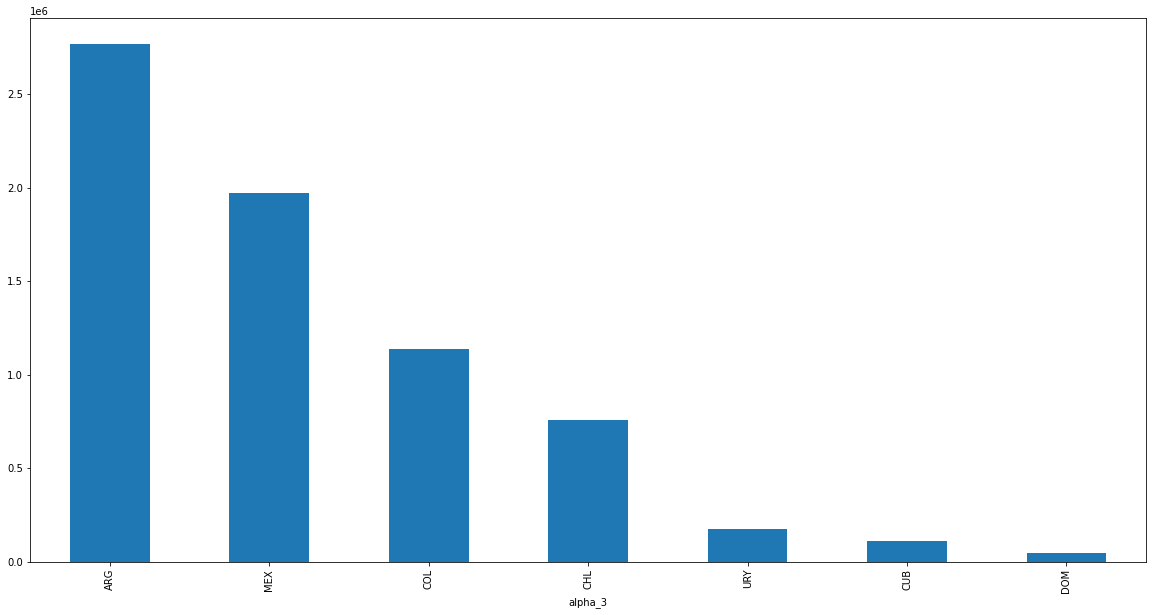

In [90]:
#2.- 
df_countries_es_peso.set_index('alpha_3').
sort_values(by='area', ascending=False)['area'].plot(kind='bar', figsize=(20,10))


In [95]:
# Cuáles son los países que tienen más de 5 paises con frontera
hy_countries.data.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,tld
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,.ad
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,unk,unk,.ae
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,unk,unk,.af
3,AG,ATG,443.0,St. John's,unk,XCD,Dollar,AC,3576396,en-AG,Antigua and Barbuda,unk,28,+1-268,86754,unk,unk,.ag
4,AI,AIA,102.0,The Valley,unk,XCD,Dollar,AV,3573511,en-AI,Anguilla,unk,660,+1-264,13254,unk,unk,.ai


In [98]:
str_paises = 'ES,FR'.split(',')

In [100]:
len(str_paises)

2

In [103]:
def conteo_frontera(x):
    str_x=[]
    try:
        str_x = x.split(',')
    except:
        pass
    return len(str_x)


In [111]:
hy_countries_front = hy_countries.data.set_index('name')['neighbours'].apply(conteo_frontera)
hy_countries_front

name
Andorra                  2
United Arab Emirates     2
Afghanistan              6
Antigua and Barbuda      1
Anguilla                 1
                        ..
South Africa             6
Zambia                   7
Zimbabwe                 4
Serbia and Montenegro    7
Netherlands Antilles     1
Name: neighbours, Length: 252, dtype: int64

<AxesSubplot:xlabel='name'>

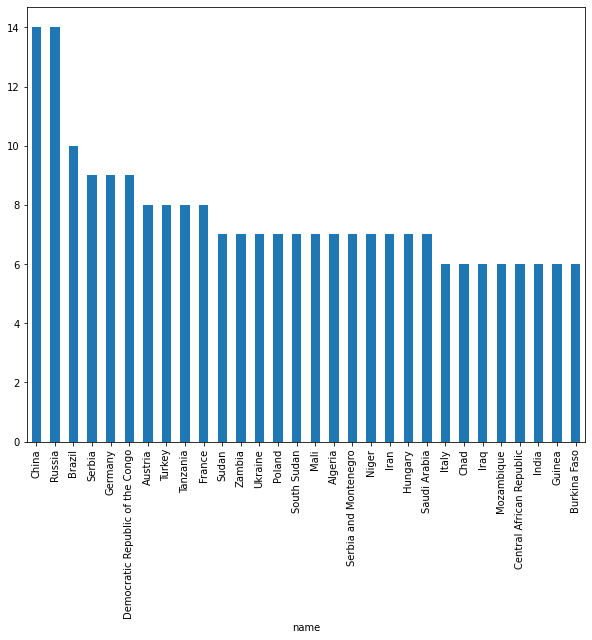

In [118]:
hy_countries_front.sort_values(ascending=False).head(30).plot(kind='bar', figsize=(10,8))